# Linear Regression

In this notebook I'll work through some examples using linear regression. I'll start my making a small dataset & then building up the algorithm from scratch.

In [2]:
## imports ##
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [30]:
## generate some data ##
n  = 200
b0 = 50
b1 = 2
x  = np.array([i for i in range(n)])
y  = b0 + b1*x + np.random.normal(loc=0,scale=15,size=n)
x  = x.reshape(-1,1)
y  = y.reshape(-1,1)

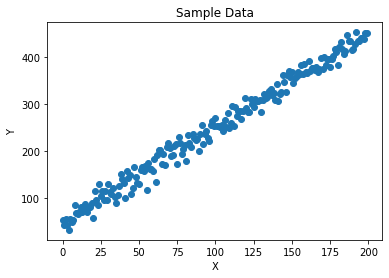

In [31]:
## plot our data ##
plt.scatter(x,y)
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [32]:
## build a class to encompass linear regression with least squares estimation ##
class LR:
    
    #initialiser
    def __init__(self):
        #private parameters array
        self.__B = np.array([])
        
    #train function
    def train(self,Xin,Yin):
        #add column of 1's to independent variables
        X        = np.ones((Xin.shape[0],Xin.shape[1]+1))
        X[:,1:]  = Xin
        #calculate the model parameters using least squares estimation
        Xfactors = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X))
        self.__B   = np.matmul(Xfactors,Yin)
        #return
        return
        
    #predict function
    def predict(self,Xin):
        #add column of 1's to independent variables
        X       = np.ones((Xin.shape[0],Xin.shape[1]+1))
        X[:,1:] = Xin
        #calculate predictions
        Yp      = np.matmul(X,self.__B)
        #return predictions
        return(Yp)
    
    #return model parameters
    def return_B(self):
        return(self.__B)

In [33]:
## fit our data and generate predictions ##

#declare a LR object
lr = LR()
#fit the model
lr.train(x,y)
#make predictions
ypred = lr.predict(x)

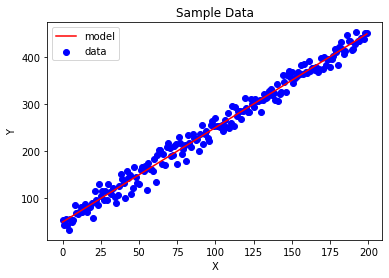

In [34]:
## plot our data + fitted results ##
plt.scatter(x,y,c='b')
plt.plot(x,ypred,c='r')
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['model','data'],loc=2)
plt.show()

In [35]:
## what is our R2 score? ##
r2_score(y,ypred)

0.9847299259878389

In [36]:
## view our model parameters ##
lr.return_B()

array([[49.11485183],
       [ 2.01258693]])

Instead of making a linear regression algorithm from scratch, we can use the API provided by scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [37]:
## imports ##
from sklearn.linear_model import LinearRegression

In [38]:
## fit our data and generate predictions ##

#declare a LinearRegression object
lr = LinearRegression()
#fit the model
lr.fit(x,y)
#make predictions
ypred = lr.predict(x)

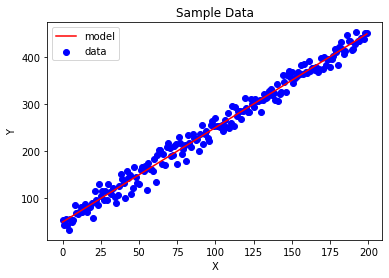

In [39]:
## plot our data + fitted results ##
plt.scatter(x,y,c='b')
plt.plot(x,ypred,c='r')
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['model','data'],loc=2)
plt.show()

In [40]:
## what is our R2 score? ##
lr.score(x,y)

0.9847299259878389

In [41]:
## view our model parameters ##
print(lr.intercept_)
print(lr.coef_)

[49.11485183]
[[2.01258693]]
